### This file has code for building CNN Model by hyperparameter tuning and applying the created model on:
1. Original FER 2013 Images
2. Pre-processed Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Extracting the original images into local file system

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset.zip"
extract_to = "/content/FERDataset_Final"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped to local Colab storage.")

Dataset unzipped to local Colab storage.


In [ ]:
import os
dir = "/content/FERDataset_Final"
def count_files(directory):
    total_files = 0
    no_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
        no_files += len(files)
        print(root,dirs,no_files)
        no_files=0
    return total_files

print("Total files extracted:", count_files(dir))

/content/FERDataset_Final ['train', 'test'] 0
/content/FERDataset_Final/train ['happy', 'angry', 'surprise', 'fear', 'neutral', 'sad', 'disgust'] 0
/content/FERDataset_Final/train/happy [] 7215
/content/FERDataset_Final/train/angry [] 3995
/content/FERDataset_Final/train/surprise [] 3171
/content/FERDataset_Final/train/fear [] 4097
/content/FERDataset_Final/train/neutral [] 4965
/content/FERDataset_Final/train/sad [] 4830
/content/FERDataset_Final/train/disgust [] 436
/content/FERDataset_Final/test ['happy', 'angry', 'surprise', 'fear', 'neutral', 'sad', 'disgust'] 0
/content/FERDataset_Final/test/happy [] 1774
/content/FERDataset_Final/test/angry [] 958
/content/FERDataset_Final/test/surprise [] 831
/content/FERDataset_Final/test/fear [] 1024
/content/FERDataset_Final/test/neutral [] 1233
/content/FERDataset_Final/test/sad [] 1247
/content/FERDataset_Final/test/disgust [] 111
Total files extracted: 35887


#### Above code displays the count of files that has been extracted locally. We can see that total 35887 files from original zip folder are extracted successfully.

## Building the Convolution Neural Network Model for Facial emotion recognition.

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [ ]:
class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(32), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(64), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(128), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 6 * 6, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

def train():
    model.train()
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss.append(running_loss)
        acc = correct / total * 100
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

def evaluate():
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    print("\nClassification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=classes))

    acc = accuracy_score(all_labels, all_preds)
    print(f" Overall Accuracy: {acc * 100:.2f}%")

## Applying the Model on Orignal Dataset

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
NUM_EPOCHS = 20
IMAGE_SIZE = 48
train_loss=[]

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class SafeImageFolder(ImageFolder):
    def __getitem__(self, index):
        try:
            return super().__getitem__(index)
        except Exception as e:
            print(f" Skipping corrupted image: {self.imgs[index][0]}")
            return torch.zeros(1, 48, 48), 0

#-------Applying model on original dataset---------
train_dataset = SafeImageFolder(root='/content/FERDataset_Final/train', transform=transform)
test_dataset = SafeImageFolder(root='/content/FERDataset_Final/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

classes = train_dataset.classes
print("Emotion Classes:", classes)

model = EmotionCNN(num_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



Emotion Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
train()


Epoch 1/20, Loss: 745.1771, Accuracy: 34.71%
Epoch 2/20, Loss: 648.0485, Accuracy: 44.07%
Epoch 3/20, Loss: 601.3313, Accuracy: 48.42%
Epoch 4/20, Loss: 563.4805, Accuracy: 51.88%
Epoch 5/20, Loss: 524.6665, Accuracy: 55.29%
Epoch 6/20, Loss: 483.5113, Accuracy: 58.67%
Epoch 7/20, Loss: 445.2703, Accuracy: 62.29%
Epoch 8/20, Loss: 402.8825, Accuracy: 65.65%
Epoch 9/20, Loss: 366.4169, Accuracy: 68.56%
Epoch 10/20, Loss: 334.6616, Accuracy: 71.36%
Epoch 11/20, Loss: 305.8426, Accuracy: 73.54%
Epoch 12/20, Loss: 287.7929, Accuracy: 75.16%
Epoch 13/20, Loss: 262.4281, Accuracy: 77.19%
Epoch 14/20, Loss: 243.4544, Accuracy: 78.82%
Epoch 15/20, Loss: 236.6454, Accuracy: 79.54%
Epoch 16/20, Loss: 220.0487, Accuracy: 80.81%
Epoch 17/20, Loss: 208.2940, Accuracy: 81.93%
Epoch 18/20, Loss: 196.5042, Accuracy: 83.04%
Epoch 19/20, Loss: 186.1597, Accuracy: 83.71%
Epoch 20/20, Loss: 182.3704, Accuracy: 84.27%


In [ ]:
evaluate()


Classification Report:

              precision    recall  f1-score   support

       angry       0.48      0.48      0.48       958
     disgust       0.90      0.32      0.47       111
        fear       0.45      0.36      0.40      1024
       happy       0.74      0.79      0.76      1774
     neutral       0.49      0.53      0.51      1233
         sad       0.41      0.44      0.42      1247
    surprise       0.75      0.71      0.73       831

    accuracy                           0.56      7178
   macro avg       0.60      0.52      0.54      7178
weighted avg       0.57      0.56      0.56      7178

 Overall Accuracy: 56.42%


### Here, we can see the model gives the Accuracy of 56.42 % for original images.

In [ ]:
print(train_loss)

[745.1770585775375, 648.0484817028046, 601.3312548398972, 563.4804871678352, 524.6664536595345, 483.51131612062454, 445.27034443616867, 402.882527589798, 366.4169060587883, 334.6616134047508, 305.84260657429695, 287.7928975224495, 262.42812046408653, 243.45444674789906, 236.6453868150711, 220.04871071875095, 208.29399360716343, 196.50420808792114, 186.15972416102886, 182.37035709619522]


## Plotting the training loss for the model

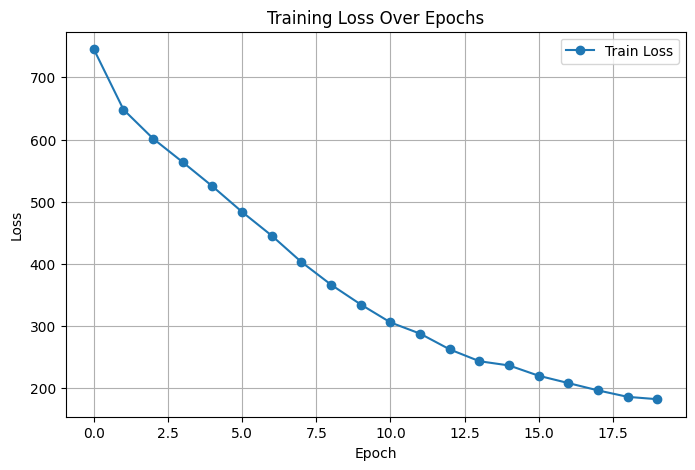

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss, marker='o', linestyle='-', label='Train Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Saving the model for further prediction

In [ ]:
torch.save(model.state_dict(), 'BaseCNN.pth')

## Applying the CNN model on Histogram + Median filtered Dataset




### Load and extract the Histogram_Median dataset

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Histogram_Median.zip"
extract_to = "/content/Histogram_Median"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped to local Colab storage.")

Dataset unzipped to local Colab storage.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
NUM_EPOCHS = 20
IMAGE_SIZE = 48

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class SafeImageFolder(ImageFolder):
    def __getitem__(self, index):
        try:
            return super().__getitem__(index)
        except Exception as e:
            print(f"Skipping corrupted image: {self.imgs[index][0]}")
            return torch.zeros(1, 48, 48), 0

#-------Applying model on Histogram_Median dataset---------
train_dataset = SafeImageFolder(root='/content/Histogram_Median/Histogram_Median/train', transform=transform)
test_dataset = SafeImageFolder(root='/content/Histogram_Median/Histogram_Median/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

classes = train_dataset.classes
print("Emotion Classes:", classes)

model = EmotionCNN(num_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Emotion Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
train()

Epoch 1/20, Loss: 757.3294, Accuracy: 33.79%
Epoch 2/20, Loss: 654.2473, Accuracy: 43.45%
Epoch 3/20, Loss: 603.0661, Accuracy: 47.98%
Epoch 4/20, Loss: 566.2555, Accuracy: 51.62%
Epoch 5/20, Loss: 528.6997, Accuracy: 54.84%
Epoch 6/20, Loss: 489.7182, Accuracy: 58.40%
Epoch 7/20, Loss: 450.4852, Accuracy: 61.41%
Epoch 8/20, Loss: 409.6417, Accuracy: 64.90%
Epoch 9/20, Loss: 375.7138, Accuracy: 67.83%
Epoch 10/20, Loss: 341.1265, Accuracy: 71.15%
Epoch 11/20, Loss: 309.3018, Accuracy: 73.36%
Epoch 12/20, Loss: 288.9376, Accuracy: 75.25%
Epoch 13/20, Loss: 262.8138, Accuracy: 77.20%
Epoch 14/20, Loss: 243.1060, Accuracy: 78.87%
Epoch 15/20, Loss: 232.8771, Accuracy: 80.01%
Epoch 16/20, Loss: 214.5267, Accuracy: 81.47%
Epoch 17/20, Loss: 205.4787, Accuracy: 82.18%
Epoch 18/20, Loss: 194.7951, Accuracy: 83.09%
Epoch 19/20, Loss: 184.9298, Accuracy: 83.96%
Epoch 20/20, Loss: 177.5765, Accuracy: 84.49%


In [ ]:
evaluate()


Classification Report:

              precision    recall  f1-score   support

       angry       0.44      0.50      0.47       958
     disgust       0.87      0.37      0.52       111
        fear       0.43      0.43      0.43      1024
       happy       0.76      0.79      0.77      1774
     neutral       0.48      0.55      0.51      1233
         sad       0.44      0.36      0.39      1247
    surprise       0.76      0.66      0.71       831

    accuracy                           0.56      7178
   macro avg       0.60      0.52      0.54      7178
weighted avg       0.57      0.56      0.56      7178

✅ Overall Accuracy: 56.20%


### CNN model gave accuracy of 56.20% fro Histogram_Median filted image dataset

## Applying the CNN model on Canny Edge Detected Dataset

Load and extract the Canny Edge dataset

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Canny.zip"
extract_to = "/content/Canny"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped to local Colab storage.")

Dataset unzipped to local Colab storage.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
NUM_EPOCHS = 20
IMAGE_SIZE = 48

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class SafeImageFolder(ImageFolder):
    def __getitem__(self, index):
        try:
            return super().__getitem__(index)
        except Exception as e:
            print(f"Skipping corrupted image: {self.imgs[index][0]}")
            return torch.zeros(1, 48, 48), 0

#-------Applying model on Canny Edge detected dataset---------
train_dataset = SafeImageFolder(root='/content/Canny/Canny/train', transform=transform)
test_dataset = SafeImageFolder(root='/content/Canny/Canny/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

classes = train_dataset.classes
print("Emotion Classes:", classes)

model = EmotionCNN(num_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Emotion Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
train()

Epoch 1/20, Loss: 810.5236, Accuracy: 26.69%
Epoch 2/20, Loss: 756.4641, Accuracy: 32.27%
Epoch 3/20, Loss: 727.6843, Accuracy: 35.06%
Epoch 4/20, Loss: 704.5367, Accuracy: 37.46%
Epoch 5/20, Loss: 678.3548, Accuracy: 39.76%
Epoch 6/20, Loss: 644.4232, Accuracy: 42.29%
Epoch 7/20, Loss: 613.6309, Accuracy: 45.26%
Epoch 8/20, Loss: 581.7920, Accuracy: 48.38%
Epoch 9/20, Loss: 554.7561, Accuracy: 50.61%
Epoch 10/20, Loss: 518.7103, Accuracy: 53.48%
Epoch 11/20, Loss: 492.2473, Accuracy: 55.88%
Epoch 12/20, Loss: 462.5089, Accuracy: 58.94%
Epoch 13/20, Loss: 438.1243, Accuracy: 60.57%
Epoch 14/20, Loss: 419.7752, Accuracy: 62.23%
Epoch 15/20, Loss: 395.5049, Accuracy: 64.77%
Epoch 16/20, Loss: 384.1670, Accuracy: 65.25%
Epoch 17/20, Loss: 368.1978, Accuracy: 66.78%
Epoch 18/20, Loss: 351.0768, Accuracy: 68.64%
Epoch 19/20, Loss: 343.7866, Accuracy: 69.23%
Epoch 20/20, Loss: 330.3382, Accuracy: 70.52%


In [ ]:
evaluate()


Classification Report:

              precision    recall  f1-score   support

       angry       0.29      0.21      0.24       958
     disgust       1.00      0.15      0.27       111
        fear       0.26      0.30      0.28      1024
       happy       0.57      0.60      0.59      1774
     neutral       0.38      0.39      0.39      1233
         sad       0.29      0.33      0.31      1247
    surprise       0.60      0.51      0.55       831

    accuracy                           0.41      7178
   macro avg       0.49      0.36      0.38      7178
weighted avg       0.42      0.41      0.41      7178

 Overall Accuracy: 40.68%


Here, Canny edge detected images gave very low accuracy of 40.60% as compared to original and Histogram + Median dataset

### After applying CNN model on filtered images, we havce also tries applyinh the CNN model on stacking the filtered images with original ones.

We have stacked the original image, with the filtered on to see get the better accuracy with the model.

## Stack Implementation

In [ ]:
import os
import torch
from PIL import Image
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision.datasets as datasets
from torchvision.datasets.folder import default_loader
from collections import defaultdict


In [ ]:
class EmotionCNN_Stack(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN_Stack, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(2, 32, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(32), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(64), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(128), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 6 * 6, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, len(train_dataset.classes))
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
class StackedFERDataset(Dataset):
    def __init__(self, original_root, filtered_root, transform=None):
        self.original_root = original_root
        self.filtered_root = filtered_root
        self.transform = transform or transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.Resize((48, 48)),
            transforms.ToTensor()
        ])

        # ---Use ImageFolder to get classes and targets---
        original_dataset = datasets.ImageFolder(root=original_root)
        self.classes = original_dataset.classes
        self.class_to_idx = original_dataset.class_to_idx
        self.samples = []

        #--- Build list of matched image pairs with labels---
        for class_name in self.classes:
            orig_class_dir = os.path.join(original_root, class_name)
            filt_class_dir = os.path.join(filtered_root, class_name)

            if not os.path.exists(filt_class_dir):
                continue

            for fname in os.listdir(orig_class_dir):
                orig_path = os.path.join(orig_class_dir, fname)
                filt_path = os.path.join(filt_class_dir, fname)
                if os.path.isfile(orig_path) and os.path.isfile(filt_path):
                    label = self.class_to_idx[class_name]
                    self.samples.append((orig_path, filt_path, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        orig_path, filt_path, label = self.samples[index]

        orig_img = default_loader(orig_path)
        filt_img = default_loader(filt_path)

        orig_tensor = self.transform(orig_img)
        filt_tensor = self.transform(filt_img)

        # --- Stack the original + filtered image---
        stacked_tensor = torch.cat([orig_tensor, filt_tensor], dim=0)

        return stacked_tensor, label

def train():
    model_stack.train()
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model_stack(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss_sharp.append(running_loss)
        acc = correct / total * 100
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

def evaluate():
    model_stack.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model_stack(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    print("\nClassification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=classes))

    acc = accuracy_score(all_labels, all_preds)
    print(f" Overall Accuracy: {acc * 100:.2f}%")



## Creating a stack of - [ Original + Histogram + Median ]

In [ ]:
train_dataset = StackedFERDataset(
    original_root='/content/FERDataset_Final/train',
    filtered_root='/content/Histogram_Median/Histogram_Median/train'
)

test_dataset = StackedFERDataset(
    original_root='/content/FERDataset_Final/test',
    filtered_root='/content/Histogram_Median/Histogram_Median/test'
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_stack = EmotionCNN_Stack(num_classes=len(train_dataset.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_stack.parameters(), lr=0.001)

In [ ]:
train()

Epoch 1/20, Loss: 733.2707, Accuracy: 35.92%
Epoch 2/20, Loss: 637.2963, Accuracy: 44.86%
Epoch 3/20, Loss: 581.7559, Accuracy: 50.40%
Epoch 4/20, Loss: 537.0426, Accuracy: 54.41%
Epoch 5/20, Loss: 495.4325, Accuracy: 58.00%
Epoch 6/20, Loss: 453.6721, Accuracy: 61.34%
Epoch 7/20, Loss: 413.0412, Accuracy: 64.92%
Epoch 8/20, Loss: 374.6904, Accuracy: 68.61%
Epoch 9/20, Loss: 334.7564, Accuracy: 71.47%
Epoch 10/20, Loss: 302.1256, Accuracy: 74.41%
Epoch 11/20, Loss: 275.0988, Accuracy: 76.98%
Epoch 12/20, Loss: 243.9806, Accuracy: 79.17%
Epoch 13/20, Loss: 226.6876, Accuracy: 80.86%
Epoch 14/20, Loss: 215.8481, Accuracy: 81.49%
Epoch 15/20, Loss: 201.5643, Accuracy: 82.89%
Epoch 16/20, Loss: 186.1170, Accuracy: 84.30%
Epoch 17/20, Loss: 179.7565, Accuracy: 84.77%
Epoch 18/20, Loss: 174.0612, Accuracy: 85.16%
Epoch 19/20, Loss: 159.4308, Accuracy: 86.47%
Epoch 20/20, Loss: 151.6828, Accuracy: 86.99%

Classification Report:

              precision    recall  f1-score   support

       an

In [ ]:
evaluate()


Classification Report:

              precision    recall  f1-score   support

       angry       0.49      0.46      0.47       958
     disgust       0.83      0.40      0.54       111
        fear       0.46      0.38      0.41      1024
       happy       0.78      0.79      0.78      1774
     neutral       0.50      0.55      0.52      1233
         sad       0.43      0.52      0.47      1247
    surprise       0.82      0.70      0.75       831

    accuracy                           0.58      7178
   macro avg       0.61      0.54      0.56      7178
weighted avg       0.59      0.58      0.58      7178

 Overall Accuracy: 58.12%


### Here, we can see Stacking of original with Histogram and Median has performed better till now.

## Creating a Stack of [ Original + Canny ]

In [ ]:
train_dataset = StackedFERDataset(
    original_root='/content/FERDataset_Final/train',
    filtered_root='/content/Canny/Canny/train'
)

test_dataset = StackedFERDataset(
    original_root='/content/FERDataset_Final/test',
    filtered_root='/content/Canny/Canny/test'
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_stack = EmotionCNN_Stack(num_classes=len(train_dataset.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_stack.parameters(), lr=0.001)

In [ ]:
train()


Epoch 1/20, Loss: 773.8950, Accuracy: 31.98%
Epoch 2/20, Loss: 691.8316, Accuracy: 39.52%
Epoch 3/20, Loss: 639.6745, Accuracy: 44.99%
Epoch 4/20, Loss: 593.2869, Accuracy: 49.31%
Epoch 5/20, Loss: 546.9120, Accuracy: 53.36%
Epoch 6/20, Loss: 503.0472, Accuracy: 57.47%
Epoch 7/20, Loss: 456.0727, Accuracy: 61.65%
Epoch 8/20, Loss: 405.2397, Accuracy: 65.81%
Epoch 9/20, Loss: 365.2271, Accuracy: 69.09%
Epoch 10/20, Loss: 328.0158, Accuracy: 72.04%
Epoch 11/20, Loss: 288.6496, Accuracy: 75.71%
Epoch 12/20, Loss: 264.8815, Accuracy: 77.45%
Epoch 13/20, Loss: 248.3438, Accuracy: 79.03%
Epoch 14/20, Loss: 220.3166, Accuracy: 81.52%
Epoch 15/20, Loss: 205.3242, Accuracy: 82.72%
Epoch 16/20, Loss: 195.5679, Accuracy: 83.45%
Epoch 17/20, Loss: 181.5561, Accuracy: 84.68%
Epoch 18/20, Loss: 172.6332, Accuracy: 85.51%
Epoch 19/20, Loss: 162.9305, Accuracy: 86.13%
Epoch 20/20, Loss: 163.4052, Accuracy: 86.45%


In [ ]:
evaluate()


Classification Report:

              precision    recall  f1-score   support

       angry       0.43      0.41      0.42       958
     disgust       0.82      0.33      0.47       111
        fear       0.38      0.41      0.39      1024
       happy       0.72      0.75      0.74      1774
     neutral       0.50      0.44      0.47      1233
         sad       0.40      0.41      0.41      1247
    surprise       0.66      0.71      0.69       831

    accuracy                           0.53      7178
   macro avg       0.56      0.50      0.51      7178
weighted avg       0.53      0.53      0.53      7178

 Overall Accuracy: 53.37%


### Stacking of Original and Canny had givem acuuracy of 53.37%

## Loading and extracting the Sharpened Dataset from zip filder

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Sharpened.zip"
extract_to = "/content/Sharpened2"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped to local Colab storage.")

Dataset unzipped to local Colab storage.


In [ ]:
import os
dir = "/content/Sharpened2"
def count_files(directory):
    total_files = 0
    no_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
        no_files += len(files)
        print(root,dirs,no_files)
        no_files=0
    return total_files

print("Total files extracted:", count_files(dir))

/content/Sharpened2 ['Sharpened'] 0
/content/Sharpened2/Sharpened ['train', 'test'] 0
/content/Sharpened2/Sharpened/train ['happy', 'angry', 'surprise', 'fear', 'neutral', 'sad', 'disgust'] 0
/content/Sharpened2/Sharpened/train/happy [] 7215
/content/Sharpened2/Sharpened/train/angry [] 3995
/content/Sharpened2/Sharpened/train/surprise [] 3171
/content/Sharpened2/Sharpened/train/fear [] 4097
/content/Sharpened2/Sharpened/train/neutral [] 4965
/content/Sharpened2/Sharpened/train/sad [] 4830
/content/Sharpened2/Sharpened/train/disgust [] 436
/content/Sharpened2/Sharpened/test ['happy', 'angry', 'surprise', 'fear', 'neutral', 'sad', 'disgust'] 0
/content/Sharpened2/Sharpened/test/happy [] 1774
/content/Sharpened2/Sharpened/test/angry [] 958
/content/Sharpened2/Sharpened/test/surprise [] 831
/content/Sharpened2/Sharpened/test/fear [] 1024
/content/Sharpened2/Sharpened/test/neutral [] 1233
/content/Sharpened2/Sharpened/test/sad [] 1247
/content/Sharpened2/Sharpened/test/disgust [] 111
Total 

## Creating a Stack of Original + Sharpened

In [ ]:
train_dataset = StackedFERDataset(
    original_root='/content/FERDataset_Final/train',
    filtered_root='/content/Sharpened2/Sharpened/train'
)

test_dataset = StackedFERDataset(
    original_root='/content/FERDataset_Final/test',
    filtered_root='/content/Sharpened2/Sharpened/test'
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

train_loss_sharp=[]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_stack = EmotionCNN_Stack(num_classes=len(train_dataset.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_stack.parameters(), lr=0.001)

In [ ]:
train()

Epoch 1/20, Loss: 723.8868, Accuracy: 37.40%
Epoch 2/20, Loss: 606.7668, Accuracy: 48.05%
Epoch 3/20, Loss: 554.9356, Accuracy: 52.90%
Epoch 4/20, Loss: 510.9183, Accuracy: 56.54%
Epoch 5/20, Loss: 474.3854, Accuracy: 59.61%
Epoch 6/20, Loss: 434.3985, Accuracy: 63.32%
Epoch 7/20, Loss: 397.3553, Accuracy: 66.64%
Epoch 8/20, Loss: 351.1131, Accuracy: 70.44%
Epoch 9/20, Loss: 319.9263, Accuracy: 73.20%
Epoch 10/20, Loss: 284.2294, Accuracy: 75.88%
Epoch 11/20, Loss: 257.1608, Accuracy: 78.29%
Epoch 12/20, Loss: 231.8316, Accuracy: 80.42%
Epoch 13/20, Loss: 220.6264, Accuracy: 81.36%
Epoch 14/20, Loss: 199.2004, Accuracy: 83.01%
Epoch 15/20, Loss: 192.6176, Accuracy: 83.63%
Epoch 16/20, Loss: 176.7547, Accuracy: 84.91%
Epoch 17/20, Loss: 162.8874, Accuracy: 86.14%
Epoch 18/20, Loss: 158.1531, Accuracy: 86.81%
Epoch 19/20, Loss: 149.2835, Accuracy: 87.59%
Epoch 20/20, Loss: 145.9684, Accuracy: 87.71%


In [ ]:
evaluate()


Classification Report:

              precision    recall  f1-score   support

       angry       0.56      0.43      0.48       958
     disgust       0.83      0.44      0.58       111
        fear       0.46      0.42      0.44      1024
       happy       0.74      0.82      0.78      1774
     neutral       0.51      0.59      0.55      1233
         sad       0.47      0.49      0.48      1247
    surprise       0.80      0.70      0.75       831

    accuracy                           0.60      7178
   macro avg       0.62      0.56      0.58      7178
weighted avg       0.60      0.60      0.59      7178

 Overall Accuracy: 59.64%


### The CNN model has performed better on Stacking of original and Sharpened images among all above dataset. It gave the accuracy of 59.64%, higher than our original image dataset.

### Comparision Training Loss for Original vs Stacking [Original + Sharpened ]

In [ ]:
train_loss = [745.1770585775375, 648.0484817028046, 601.3312548398972, 563.4804871678352, 524.6664536595345, 483.51131612062454, 445.27034443616867, 402.882527589798, 366.4169060587883, 334.6616134047508, 305.84260657429695, 287.7928975224495, 262.42812046408653, 243.45444674789906, 236.6453868150711, 220.04871071875095, 208.29399360716343, 196.50420808792114, 186.15972416102886, 182.37035709619522]

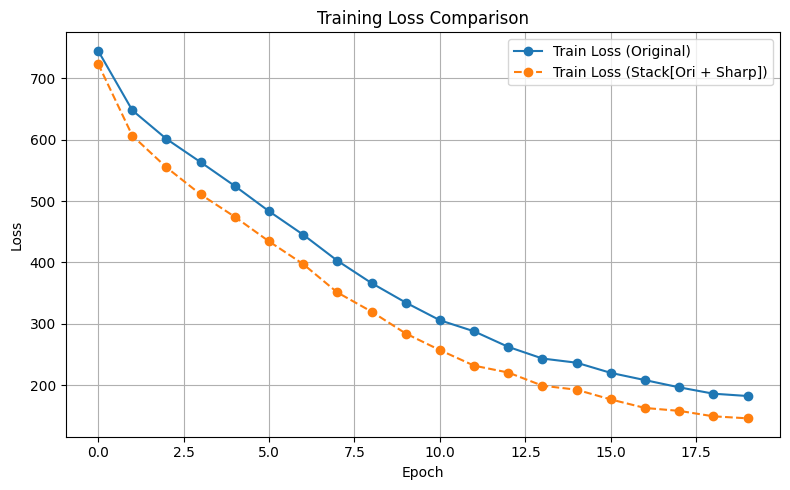

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss, marker='o', linestyle='-', label='Train Loss (Original)')
plt.plot(train_loss_sharp, marker='o', linestyle='--', label='Train Loss (Stack[Ori + Sharp])')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparison plot of CNN model for all the dataset seen till now

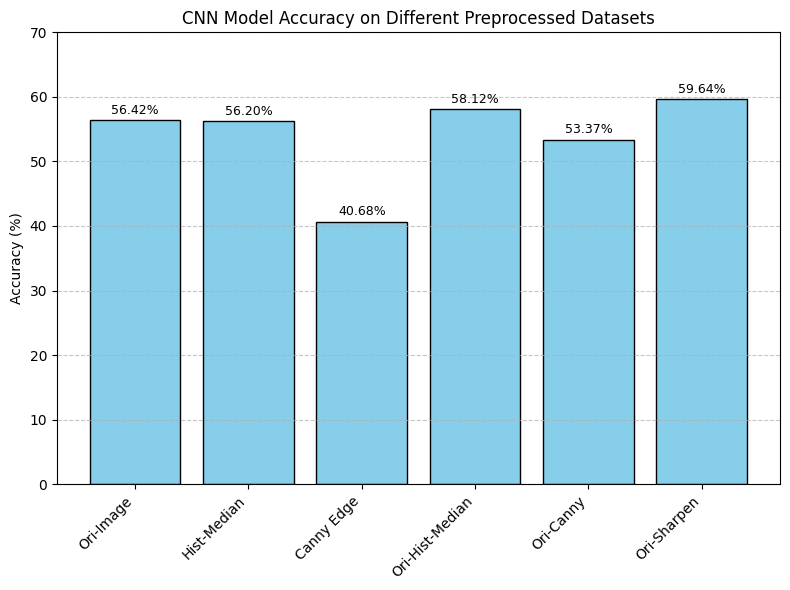

In [ ]:

import matplotlib.pyplot as plt

# Dataset and corresponding accuracies
datasets = [
    'Ori-Image',
    'Hist-Median',
    'Canny Edge',
    'Ori-Hist-Median',
    'Ori-Canny',
    'Ori-Sharpen'
]

accuracies = [56.42, 56.20, 40.68, 58.12, 53.37, 59.64]

plt.figure(figsize=(8, 6))
bars = plt.bar(datasets, accuracies, color='skyblue', edgecolor='black')

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

plt.ylabel('Accuracy (%)')
plt.title('CNN Model Accuracy on Different Preprocessed Datasets')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
